In [1]:
from scipy.io import wavfile
fs, data = wavfile.read('morse-code.wav')

In [2]:
%matplotlib inline

In [3]:
from pylab import plot, hist
from scipy.fftpack import fft, fftfreq


In [4]:
import pandas as pd
import numpy as np

In [5]:
#Assume 44.1KHz sampling

def max_freq(data):
    ind = np.argmax(abs(fft(data)))
    return fftfreq(len(data), 1/44100.)[ind]

max_freqs = np.array([max_freq(data[ind:ind+2000]) for ind in range(0, data.shape[0],100)])
# pd.rolling_apply(data[:], 4000, max_freq)

## Histogram of max frequencies

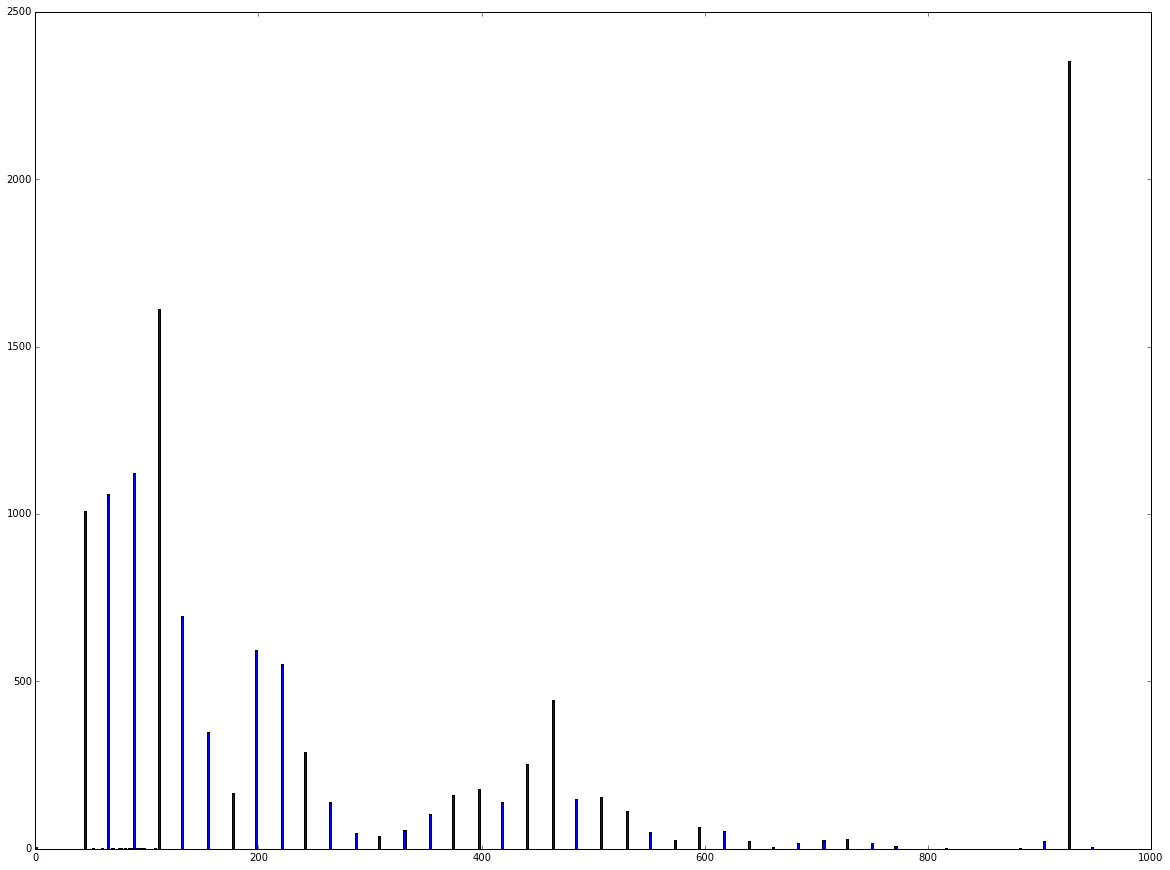

In [6]:
from pylab import figure
figure(figsize=(20,15))
hist(max_freqs[max_freqs < 1000], bins=500)
None

## Label Tones as max freq between 850 Hz and 950 Hz

In [7]:
from pylab import hist
tones = (max_freqs > 850.) & (max_freqs < 950.)

In [8]:
figure(figsize=(20,15))

tones = pd.rolling_mean(tones, 3) > 0.5

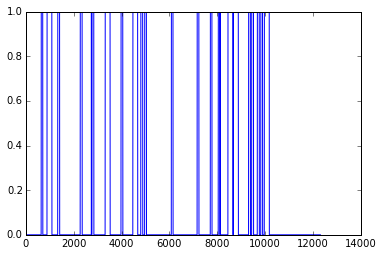

In [9]:
plot(tones)

## Label spaces as "False"  tones as "True" 

## record times for the tones and spaces

In [10]:
state=False

start_state = 0

transitions = []
times = []
for i, tone in enumerate(tones):
    if state != tone:
        transitions.append(state)
        times.append(i - start_state)
        start_state = i
    state = tone

# Histogram of Tone lengths

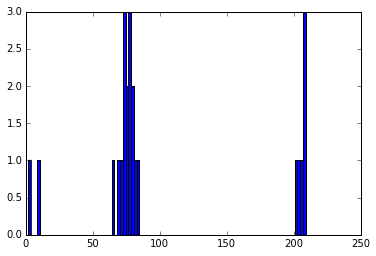

In [11]:
hist(np.array(times)[np.where(np.array(transitions))], bins=100)
None

## Histogram of Space lengths

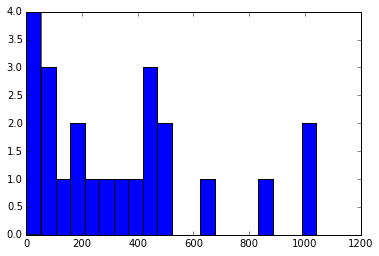

In [12]:
hist(np.array(times)[np.where(~np.array(transitions))], bins=20)
None

## Sequence of Tones and Spaces with their timing

In [13]:

for trans, time in zip(transitions,times):
    print trans,time

False 636
True 66
False 178
True 203
False 245
True 79
False 861
True 81
False 387
True 2
False 22
True 77
False 474
True 207
False 456
True 75
False 420
True 202
False 130
True 80
False 82
True 74
False 1041
True 71
False 1008
True 74
False 477
True 69
False 263
True 78
False 2
True 9
False 316
True 206
False 20
True 209
False 429
True 76
False 53
True 77
False 158
True 83
False 63
True 74
False 73
True 208


## Attempt decoding

Write detected . and - spaced out by timing (space = 80000 samples).

In [14]:
s = ""
for trans, time in zip(transitions,times):
    label = ''
    if trans and time > 50 and time < 100:
        label = '.'
    if trans and time > 190 and time < 250:
        label = '-'
    if not trans:
        for _ in range(0, int(round(time/80))):
            s += ' '
    s += label
    
    #R EETT E SO
s

'       .  -   .          .    .     -     .     - . .             .            .     .   .   --     .. ..-'

```
.  -   . R
.    .     -     . F
- . . D
. E
.     .   .  S
-- M
.. I
..- U
```

RFDESMIU

